In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as cm
import datetime
from datetime import timedelta
from epiweeks import Week, Year
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
from pandas.plotting import lag_plot
%matplotlib inline
%config Completer.use_jedi = False

In [28]:
ww=pd.read_csv('/project/biocomplexity/aniadiga/data_dump/ww_cases_MooresCreek.csv')

In [29]:
ww=ww.set_index('time_value')

In [30]:
wtemp=ww.loc['2023-01-01':]

In [63]:
wtemp=wtemp.drop(['geo_value','geo_res'],axis=1)

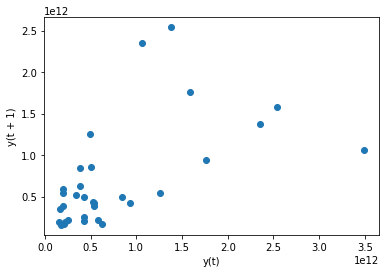

In [35]:
pd.plotting.lag_plot(wtemp['viral_load'], lag=1)

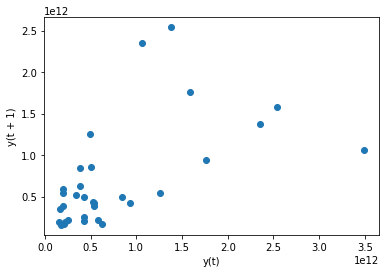

In [70]:
lag_plot((wtemp['viral_load']), lag=1)

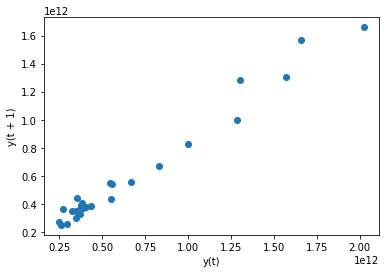

In [37]:
lag_plot(wtemp['viral_load'].rolling(7).mean(), lag=1)

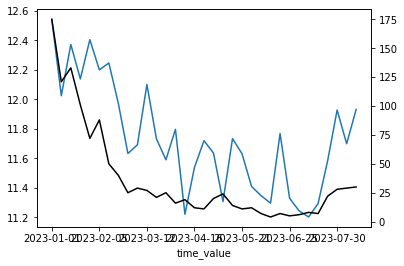

In [131]:
_,ax=plt.subplots()
# wtemp['viral_load'].rolling(3,center=True).mean().plot(ax=ax)
wtemp['log_viral_load'].plot(ax=ax)
ax2=ax.twinx()
wtemp['BOW_cases'].plot(ax=ax2,color='k')

In [50]:
wtemp.loc[:,'log_viral_load']=np.log10(wtemp['viral_load'])
wtemp.loc[:,'rol_viral_load']=wtemp['viral_load'].rolling(3,center=True).mean()

/home/aa5dw/miniconda3/envs/fct/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/aa5dw/miniconda3/envs/fct/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


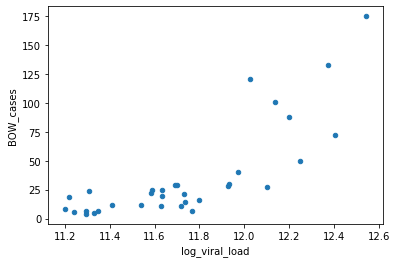

In [57]:
wtemp[['BOW_cases','log_viral_load']].plot.scatter(x='log_viral_load',y='BOW_cases')

In [93]:
kpss_test(wtemp[['BOW_cases','viral_load']].diff())

/home/aa5dw/miniconda3/envs/fct/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


,BOW_cases,viral_load
Test statistic,0.1389,0.1637
p-value,0.0632,0.0352
Critical value - 1%,0.2160,0.2160
Critical value - 2.5%,0.1760,0.1760
Critical value - 5%,0.1460,0.1460
Critical value - 10%,0.1190,0.1190


In [69]:
adf_test(wtemp)

,viral_load,BOW_cases,log_viral_load,rol_viral_load
Test statistic,-4.6916,-5.0681,-3.0323,-1.9045
p-value,0.0001,0.0000,0.0320,0.3299
Critical value - 1%,-3.6535,-3.6535,-3.6535,-3.6791
Critical value - 5%,-2.9572,-2.9572,-2.9572,-2.9679
Critical value - 10%,-2.6176,-2.6176,-2.6176,-2.6232


In [126]:
tt=grangercausalitytests((wtemp[['BOW_cases','viral_load']].diff()).dropna(), 1, verbose=False)

In [121]:
test_data=wtemp[['BOW_cases','viral_load']].dropna()

In [127]:
t1,t2=granger_causation_matrix(test_data, test_data.columns, 2)  

/home/aa5dw/miniconda3/envs/fct/lib/python3.6/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


In [128]:
t1

,BOW_cases_x,viral_load_x
BOW_cases_y,1.0,0.3913
viral_load_y,0.0,1.0000


In [129]:
t2

,BOW_cases_x,viral_load_x
BOW_cases_y,0.0,1.0
viral_load_y,0.0,0.0
